# Тестирование алгоритма Вигдерсона

In [112]:
import numpy as np
from scipy.stats import bernoulli, uniform, randint
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', family='serif', size="13")

from WigdersonAlgorithm import get_coloring

## Вспомогательные функции и генерация графов
Генерируется $k$-дольный случайный граф с заданной вероятностью ребра, $k \in \{2, 3\}$

In [60]:
def is_legal_coloring(graph, colors):
    for v in range(len(graph)):
        for u in graph[v]:
            if colors[v] == colors[u]:
                return False

    return True


def get_k_coloring_sample(sizes=[333, 333, 333], p=0.5):
    graph = [[] for i in range(sum(sizes))]
    
    starts = [0] + list(np.cumsum(sizes))
    
    for i in range(len(sizes)):
        for j in range(i + 1, len(sizes)):
            for v in range(starts[i], starts[i + 1]):
                for u in range(starts[j], starts[j + 1]):
                    if bernoulli.rvs(p):
                        graph[v].append(u)
                        graph[u].append(v)
    
    return graph


def test(ns, p):
    graph = get_k_coloring_sample(ns, p)
    colors = get_coloring(graph)
    return is_legal_coloring(graph, colors), max(colors)

## Стресс-тест

In [65]:
def test_correctness(k=10):
    for i in range(k):
        n = randint.rvs(1, 100)
        is_legal, num_colors = test([n, n, n], uniform.rvs())
        if not is_legal:
            print("error!")
            return
        print("test", i, "OK")
    
    print("OK")

In [66]:
test_correctness()

test 0 OK
test 1 OK
test 2 OK
test 3 OK
test 4 OK
test 5 OK
test 6 OK
test 7 OK
test 8 OK
test 9 OK
OK


## Проверка асимптотики количества цветов.
Из алгоритма их должно быть не больше $3 \cdot \sqrt{n}$.

In [109]:
def get_asymptotic_data(p=0.2):
    N = 303
    ns = range(1, N, 30)
    nums = []

    for n in ns:
        is_legal, num = test([n, n, n], p)
        nums.append(num)
    
    return ns, nums

In [110]:
ns = [0, 0, 0]
nums = [0, 0, 0]

ns[0], nums[0] = get_asymptotic_data(0.2)
ns[1], nums[1] = get_asymptotic_data(0.5)
ns[2], nums[2] = get_asymptotic_data(0.8)

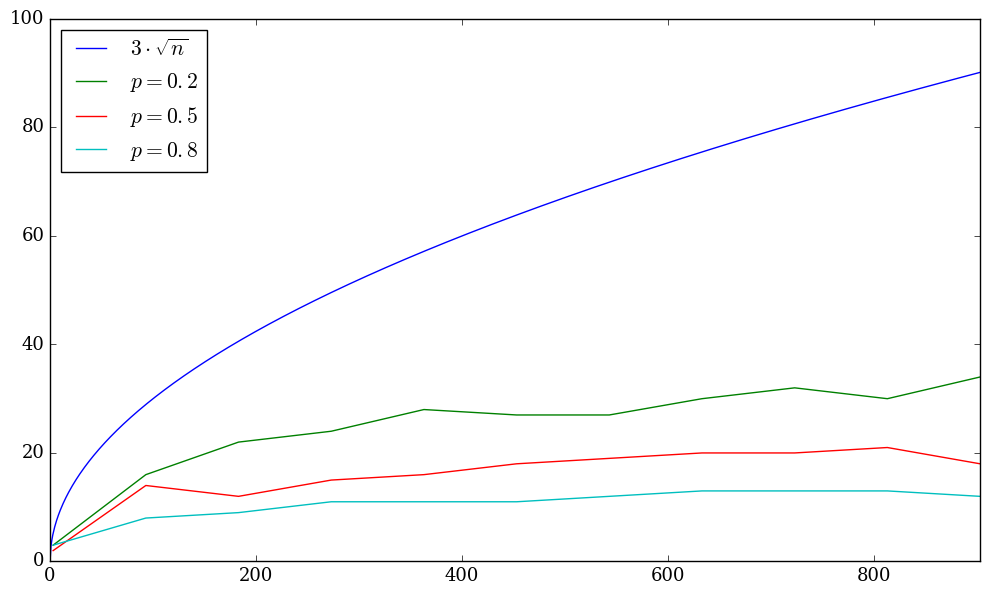

In [111]:
plt.figure(figsize=(12, 7))
N = max(ns[0])
plt.plot(np.linspace(0, N, 1000) * 3, 3 * np.sqrt(np.linspace(0, N, 1000) * 3), label=r'$3 \cdot \sqrt{n}$')
plt.plot(np.array(ns[0]) * 3, nums[0], label=r'$p = 0.2$')
plt.plot(np.array(ns[1]) * 3, nums[1], label=r'$p = 0.5$')
plt.plot(np.array(ns[2]) * 3, nums[2], label=r'$p = 0.8$')
plt.legend(loc='upper left')
plt.xlim(0, N * 3)
plt.show()

Асимптотика, очевидно подтверждена.

Однако видим, что при увеличении $p$ приближение становится лучше. Посмотрим подробнее на график распределения количества цветов

## Распределение количества цветов по вероятностям

In [67]:
ns = [30, 30, 30]

num_colors = dict()
for p in np.linspace(0, 1, 11):
    num_colors[p] = 0

N = 10
for i in range(N):
    for p in np.linspace(0, 1, 11):
        is_legal, num = test(ns, p)
        assert is_legal
        num_colors[p] += num

ps = np.linspace(0, 1, 11)
num_colors = np.array(list(sorted(num_colors.items())))[:, 1] / N

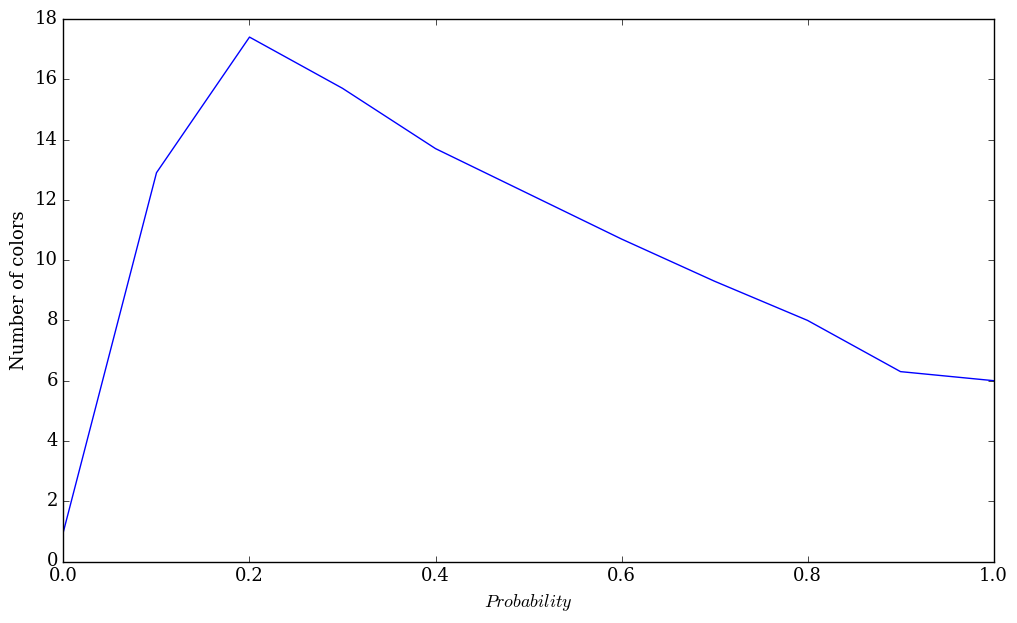

In [68]:
plt.figure(figsize=(12, 7))
plt.plot(ps, num_colors)
plt.xlabel(r'$Probability$')
plt.ylabel(r'Number of colors')
plt.show()

Видим, что алгоритм хуже работает на разряженных графах (просто в силу того, что при малых p алгоритм вырождается в жадный).